In [18]:
from tqdm import trange

import numpy as np

import torch as th
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt

In [19]:
hidden_layer_neurons = 1024
EPOCHS = 10
LEARNING_RATE = 0.01
MOMENTUM = 0.0
WEIGHT_DECAY = 0.0

In [20]:
if WEIGHT_DECAY > 0:
    save_as = f"reg_{WEIGHT_DECAY}_{hidden_layer_neurons}"
else:
    save_as = f"not_reg_{hidden_layer_neurons}"

In [21]:
save_as

'not_reg_1024'

In [22]:
%store save_as

Stored 'save_as' (str)


In [23]:
from src.model import MyModel

# Model instantiation
model = MyModel(hidden_layer_neurons=hidden_layer_neurons)

# Device selection
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model = model.to(device)
print(f"Using device: {device}")

optimizer = th.optim.Adam(
    model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY
)

criterion = nn.NLLLoss()

Using device: cpu


In [24]:
# Defining transforms
BATCH_SIZE = 64

to_tensor = transforms.ToTensor()
normalization = transforms.Normalize(mean=0.1307, std=0.3081)

# Loading the datasets
train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    transform=transforms.Compose([to_tensor, normalization]),
    download=True,
)


test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    transform=transforms.Compose([to_tensor, normalization]),
    download=True,
)


train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [25]:
%store test_loader

Stored 'test_loader' (DataLoader)


In [26]:
from src.train_test import train, test, weight_reset

# train the netowork

train_losses = []
train_accu = []

eval_losses = []
eval_accu = []

model.apply(weight_reset)

for epoch in range(1, EPOCHS + 1):
    train(
        epoch,
        train_loader,
        model=model,
        device=device,
        criterion=criterion,
        optimizer=optimizer,
        train_losses=train_losses,
        train_accu=train_accu,
    )
    test(
        test_loader,
        model=model,
        device=device,
        criterion=criterion,
        eval_losses=eval_losses,
        eval_accu=eval_accu,
    )


Epoch : 1
Train Loss: 0.321 | Accuracy: 91.565
Test Loss: 0.235 | Accuracy: 94.250

Epoch : 2
Train Loss: 0.219 | Accuracy: 94.382
Test Loss: 0.224 | Accuracy: 94.390

Epoch : 3
Train Loss: 0.189 | Accuracy: 95.093
Test Loss: 0.300 | Accuracy: 93.270

Epoch : 4
Train Loss: 0.187 | Accuracy: 95.250
Test Loss: 0.267 | Accuracy: 93.980

Epoch : 5
Train Loss: 0.175 | Accuracy: 95.600
Test Loss: 0.227 | Accuracy: 94.960

Epoch : 6
Train Loss: 0.164 | Accuracy: 96.007
Test Loss: 0.296 | Accuracy: 94.140

Epoch : 7
Train Loss: 0.164 | Accuracy: 95.822
Test Loss: 0.270 | Accuracy: 95.260

Epoch : 8
Train Loss: 0.165 | Accuracy: 95.920
Test Loss: 0.251 | Accuracy: 95.400

Epoch : 9
Train Loss: 0.153 | Accuracy: 96.270
Test Loss: 0.279 | Accuracy: 94.100

Epoch : 10
Train Loss: 0.151 | Accuracy: 96.210
Test Loss: 0.274 | Accuracy: 95.010


In [27]:
from src.activations_weights import get_activations, get_weights

hidden_activations, output_activations, predicted = get_activations(
    test_loader=test_loader,
    device=device,
    model=model,
    save=True,
    save_as=save_as,
)

weights_first_layer, weights_second_layer = get_weights(
    model=model, save=True, save_as=save_as
)

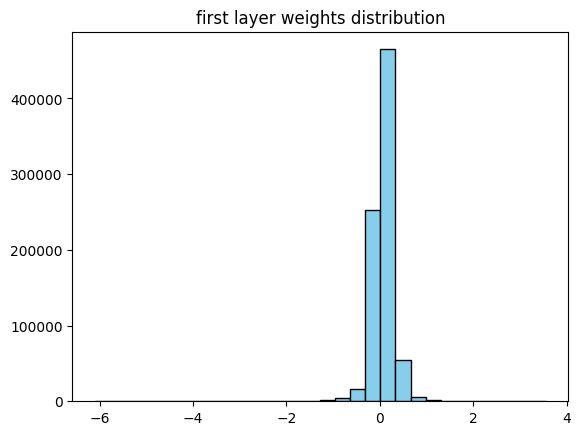

In [28]:
plt.hist(weights_first_layer.flatten(), bins=30, edgecolor="black", color="skyblue")
plt.title("first layer weights distribution")
plt.savefig(f"plot_outputs/weights_distribution_{save_as}.png")
plt.show()

In [29]:
predicted[:40]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 9, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


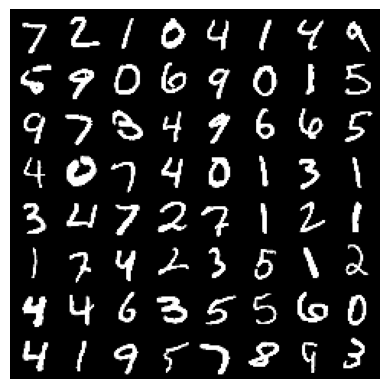

In [30]:
# The same plotting function from the previous lab
def imshow(img):
    npimg = img.numpy()
    plt.axis("off")
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# Visualizing the augmented training dataset
# Same as in previous lab

dataiter = test_loader.__iter__()
images, labels = dataiter.__next__()

imshow(torchvision.utils.make_grid(images))

## Plot hidden activations manifold and output activations manifold


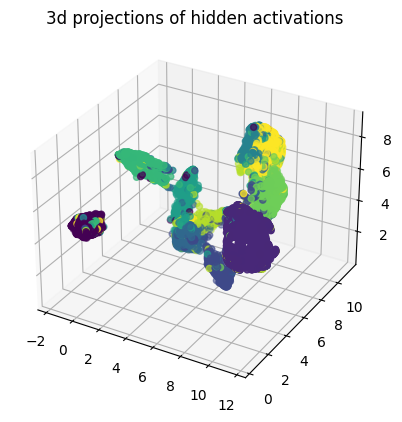

In [31]:
from src.plot_manifold import plot_manifold_running

plot_manifold_running(
    data=hidden_activations,
    n_components=3,
    save_as=save_as,
    predicted=predicted,
    title="3d projections of hidden activations",
)

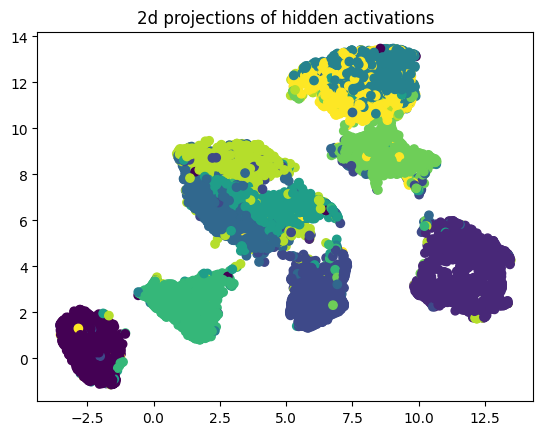

In [32]:
from src.plot_manifold import plot_manifold_running

plot_manifold_running(
    data=hidden_activations,
    n_components=2,
    save_as=save_as,
    predicted=predicted,
    title="2d projections of hidden activations",
)

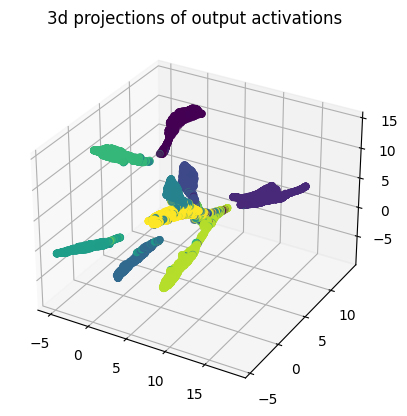

In [33]:
from src.plot_manifold import plot_manifold_running

plot_manifold_running(
    data=output_activations,
    n_components=3,
    save_as=save_as,
    predicted=predicted,
    title="3d projections of output activations",
)

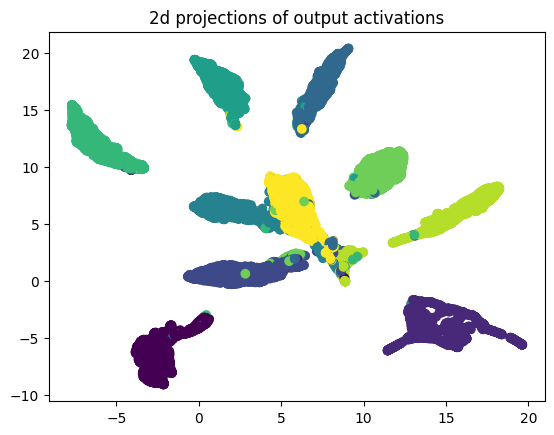

In [34]:
from src.plot_manifold import plot_manifold_running

plot_manifold_running(
    data=output_activations,
    n_components=2,
    save_as=save_as,
    predicted=predicted,
    title="2d projections of output activations",
)

## Compute persistence


usetex mode requires TeX.


[1]


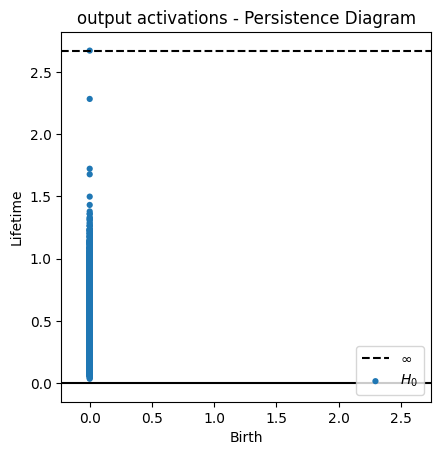

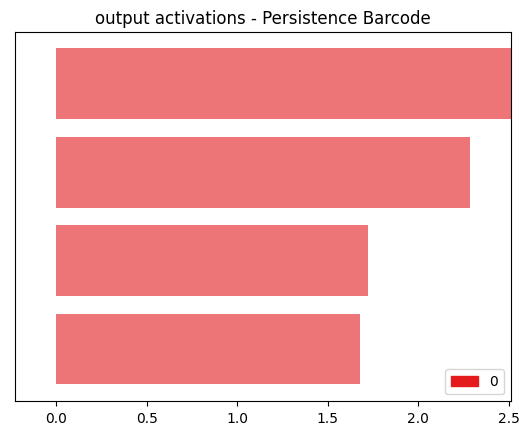

In [21]:
from src.compute_persistent_hom import compute_persistent_hom

compute_persistent_hom(
    data=output_activations, thresh=40, title="output activations", save_as=save_as
)

[1]


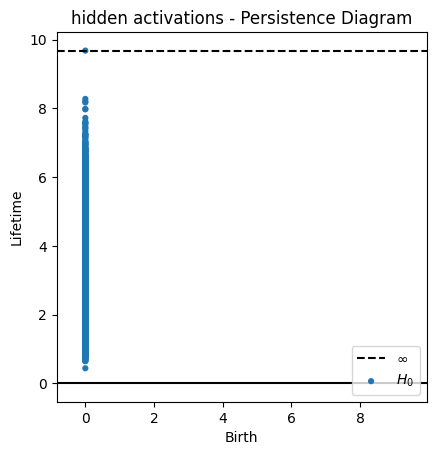

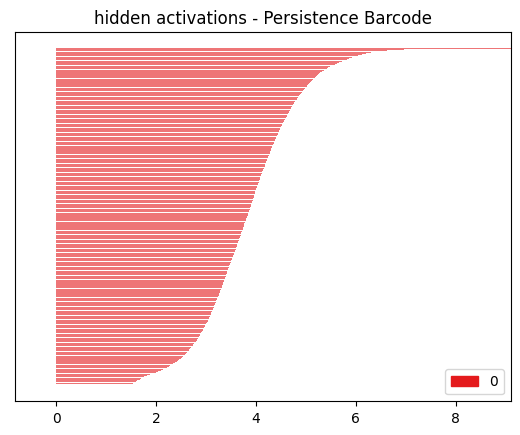

In [22]:
compute_persistent_hom(
    data=hidden_activations, thresh=40, title="hidden activations", save_as=save_as
)